# This is a simple example of how to load and plot the provided data.

In [3]:
!wandb login 03a320edf7410d8f2b14c3ecacecf15b2aab633b

wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\iamad\_netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


C:\Users\iamad\AppData\Local\Temp\ipykernel_24468\3559393835.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epoch["epoch"] = df_epoch["epoch"].astype(int)


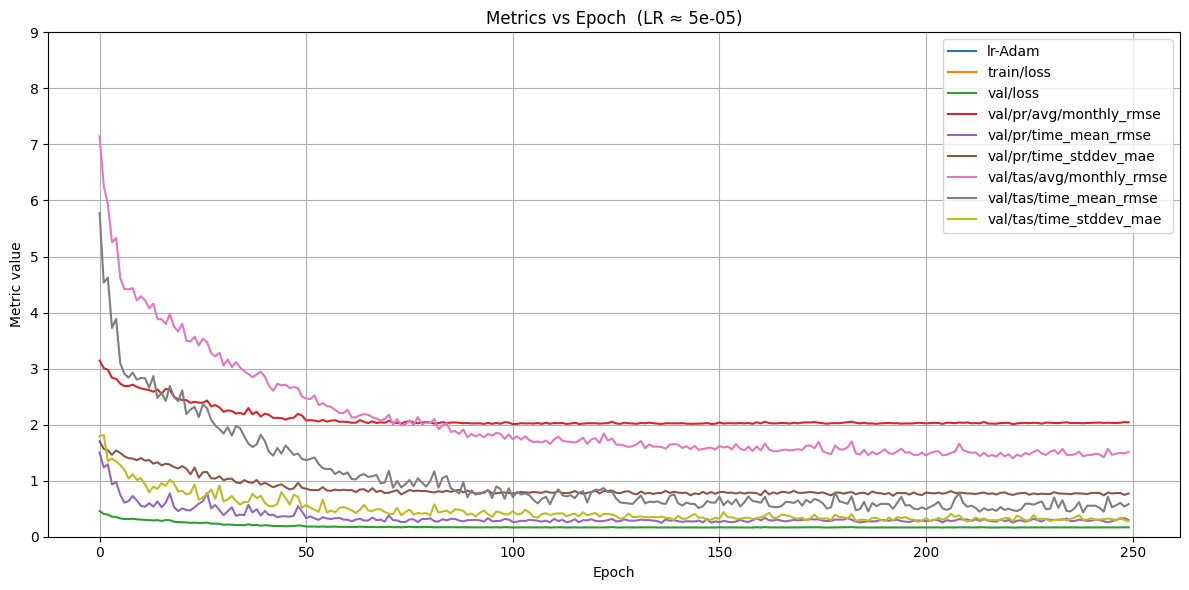

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
log_dir = "../outputs/2025-04-28/lr5e-4_Epoch250/lightning_logs"  # folder where your logs are stored
version = "version_0"       # ← e.g. "version_0", "version_1", etc.

# === LOAD & PROCESS ===
metrics_path = os.path.join(log_dir, version, "metrics.csv")
df = pd.read_csv(metrics_path)

# 0) Auto-detect your LR column (e.g. "lr-Adam")
lr_cols = [c for c in df.columns if "lr" in c.lower()]
if not lr_cols:
    learning_rate = "?"
else:
    # take the first lr-column and grab its first (constant) value
    lr_col = lr_cols[0]
    learning_rate = df[lr_col].iloc[0]

# 1) Keep only rows with a valid epoch
df = df[df["epoch"].notna()]

# 2) Sort by epoch→step, then keep the *last* row per epoch   
#    (that way you capture val/test logs which Lightning emits at end-of-epoch)
df = df.sort_values(["epoch", "step"])
df_epoch = df.drop_duplicates(subset=["epoch"], keep="last")
df_epoch["epoch"] = df_epoch["epoch"].astype(int)



#learning_rate = 0.5

# 4) Which columns are metrics?  Drop the generic ones
non_metrics = {"step", "epoch", "timestamp"}
metric_cols = [c for c in df_epoch.columns if c not in non_metrics]

# === PLOT ===
plt.figure(figsize=(12, 6))
for col in metric_cols:
    plt.plot(df_epoch["epoch"], df_epoch[col], label=col)

plt.xlabel("Epoch")
plt.ylabel("Metric value")
plt.title(f"Metrics vs Epoch  (LR ≈ {learning_rate})")
plt.legend(loc="best")
plt.grid(True)

# Uncomment and adjust the next line if you want fixed vertical range:
plt.ylim(0, 9)  # e.g., set y between 0 and 1

plt.tight_layout()
plt.show()



In [ ]:
!pip install -r "../requirements.txt"

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 38.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 44.8 MB/s e

In [31]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
# Load the data (update the path to the correct location)
data_path = "../processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path,
    decode_times= False
)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB ...
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB ...
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) int64 8kB 0 31 59 90 120 ... 30903 30933 30964 30994 31025
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB ...
    CH4        (ssp, time) float64 33kB ...
    CO2        (ssp, time) float64 33kB ...
    SO2        (ssp, time, latitude, longitude) float64 113MB ...
    pr         (ssp, time, member_id, y, x) float32 169MB ...
    rsdt       (ssp, time, y, x) float32 56MB ...
    tas        (ssp, time, member_id, y, x) float32 169MB ...
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

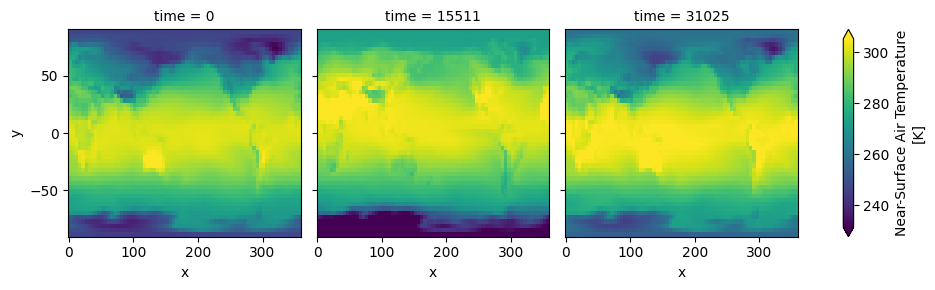

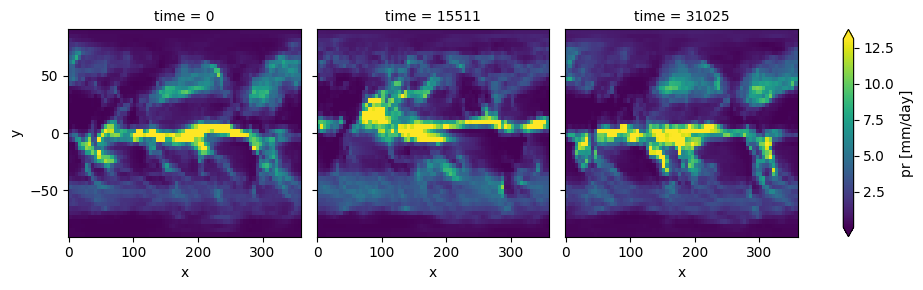

In [33]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

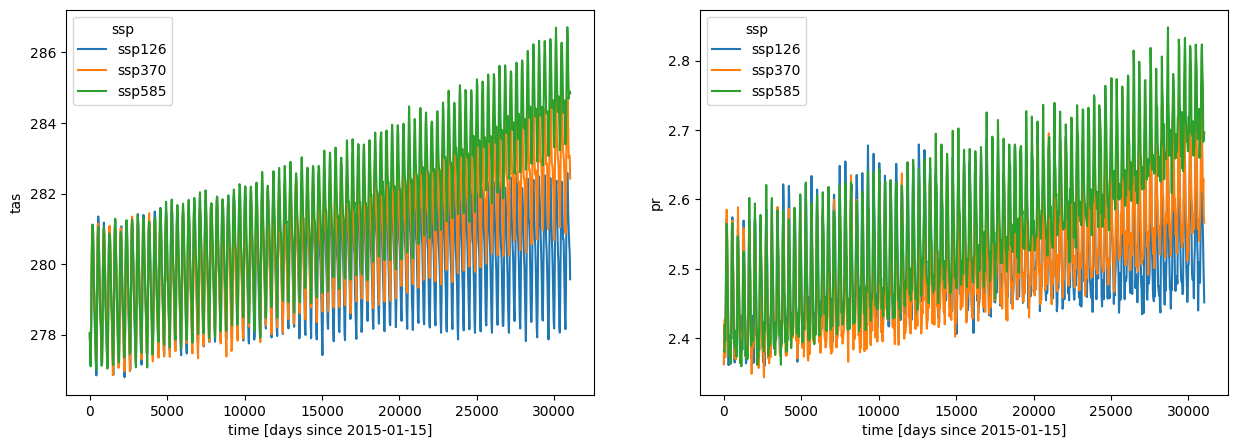

In [34]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

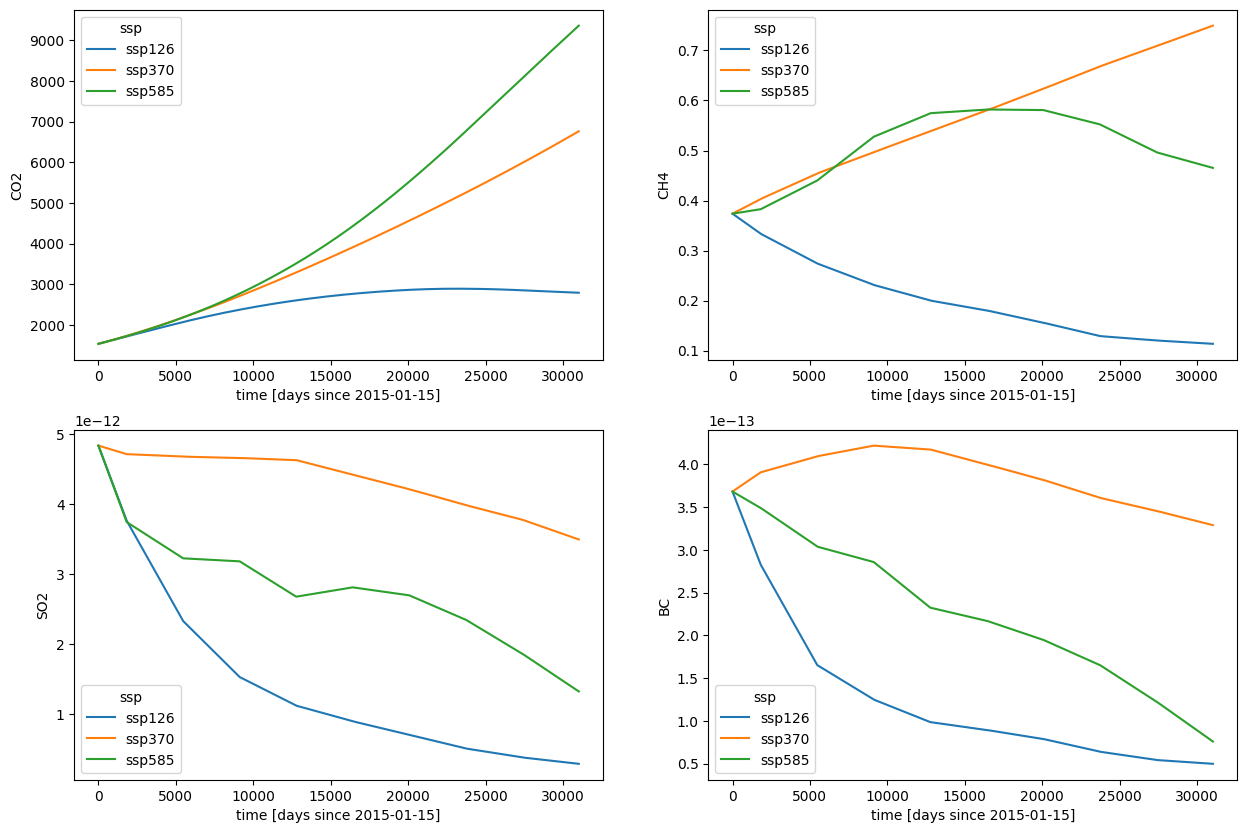

In [35]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")